In [ ]:
#!pip install arviz --no-dependencies
#!pip install pymc3

In [ ]:
# API quick start

In [85]:
import pymc3 as pm
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Free RVs, model.logp, densityfunction.logp

In [226]:
random.seed(42)
obsv = np.random.randn(100)
mu_list = []
with pm.Model() as model:
    mu = pm.Normal('mu', mu = 0, sd = 1)
    
    obs = pm.Normal('obs', mu = mu, sd = 1,
                    observed = obsv)
    
    print(model.logp({'mu':0}))
    
    print(mu.logp({'mu':0})) # logp calculates the logprobability of a value
        
print(model.basic_RVs, model.free_RVs, model.observed_RVs)   

-134.91571604217972
-0.9189385332046727
[mu, obs] [mu] [obs]


# All logp values of the model

In [264]:
random.seed(42)
obsv = np.random.randn(100)
mu_list = []
with pm.Model() as model:
    mu = pm.Normal('mu', mu = 0, sd = 1)
    
    obs = pm.Normal('obs', mu = mu, sd = 1,
                    observed = obsv)
    trace = pm.sample(100, chains = 1)

# These are the same values you get for 'mu' from trace
values = np.array([trace.point(i, c) for c in trace.chains for i in range(len(trace))])
values[:10]

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu]
Sampling chain 0, 0 divergences: 100%|██████████| 600/600 [00:04<00:00, 148.81it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


array([{'mu': 0.08472817990683121}, {'mu': 0.07511902708944933},
       {'mu': 0.10896920848307054}, {'mu': -0.040487898588488044},
       {'mu': 0.1261248481180371}, {'mu': -0.013819369020996883},
       {'mu': 0.05093809013919434}, {'mu': 0.08409141431187027},
       {'mu': 0.24784360458165444}, {'mu': 0.1267387621678143}],
      dtype=object)

trace.point(id, chain) gives the idx-th sample of chain[i]

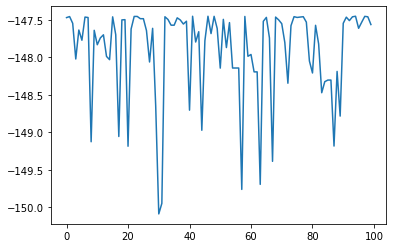

In [267]:
values_logp = np.array([logp(trace.point(i, c)) for c in trace.chains for i in range(len(trace))])
plt.plot(values_logp)

In [269]:
trace['mu'][:10]

array([ 0.08472818,  0.07511903,  0.10896921, -0.0404879 ,  0.12612485,
       -0.01381937,  0.05093809,  0.08409141,  0.2478436 ,  0.12673876])

As you can see above the values we get through trace['mu'] and trace.point are the same. The posterior distribution is calculated as logp values. Where lopp values I guess are the sum of all random variables. Further, these values are returned back in their original form(scale) of the data. 

# Save log posterior values using model.logpt

In [270]:
random.seed(42)
obsv = np.random.randn(100)
mu_list = []
with pm.Model() as model:
    mu = pm.Normal('mu', mu = 0, sd = 1)
    
    obs = pm.Normal('obs', mu = mu, sd = 1,
                    observed = obsv)
    
    print(model.logp({'mu':0}))
    
    print(mu.logp({'mu':0})) # logp calculates the logprobability of a value
    
    # The log
    lik_h = pm.Deterministic('lik_h', model.logpt)
    trace = pm.sample(100, chains = 1)
    
print(model.basic_RVs, model.free_RVs, model.observed_RVs)   

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


-142.9531831728097
-0.9189385332046727


Sequential sampling (1 chains in 1 job)
NUTS: [mu]
Sampling chain 0, 0 divergences: 100%|██████████| 600/600 [00:05<00:00, 113.23it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


[mu, obs] [mu] [obs]


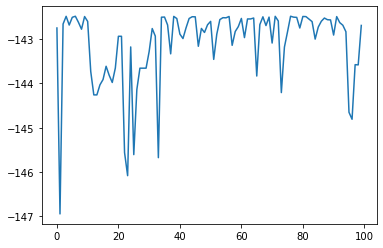

In [271]:
plt.plot(trace['lik_h'])

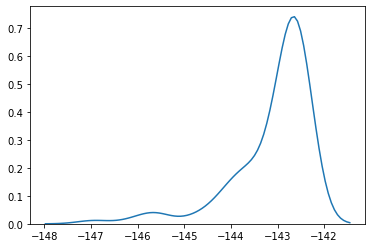

In [273]:
sns.kdeplot(trace['lik_h'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


-136.3207479186535
-0.9189385332046727


Sequential sampling (1 chains in 1 job)
NUTS: [mu]
Sampling chain 0, 0 divergences: 100%|██████████| 1500/1500 [00:07<00:00, 208.59it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


[mu, obs] [mu] [obs]


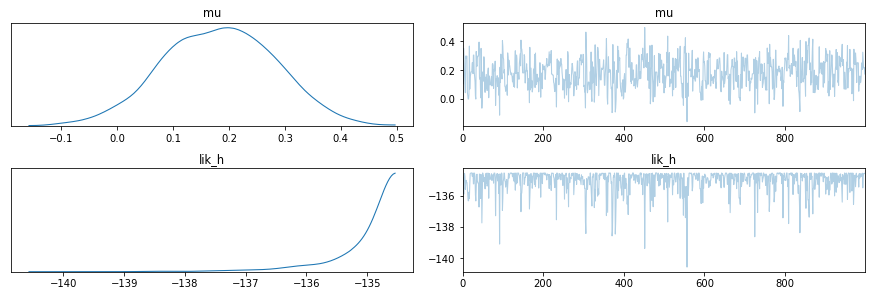

In [275]:
random.seed(42)
obsv = np.random.randn(100)
mu_list = []
with pm.Model() as model:
    mu = pm.Normal('mu', mu = 0, sd = 1)
    
    obs = pm.Normal('obs', mu = mu, sd = 1,
                    observed = obsv)
    
    print(model.logp({'mu':0}))
    
    print(mu.logp({'mu':0})) # logp calculates the logprobability of a value
    
    # The log
    lik_h = pm.Deterministic('lik_h', model.logpt)
    trace = pm.sample(1000, chains = 1)
    
    print(model.basic_RVs, model.free_RVs, model.observed_RVs)   
    
    pm.plot_trace(trace)


# How does values Vs logp looks like

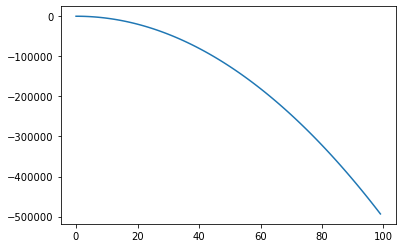

In [305]:
# First try logp1 from numpy
a = np.array([i for i in range(100)])
b = np.array([model.logp({'mu': i}) for i in range(100)])
plt.plot(a, b)

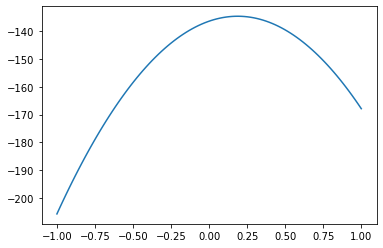

In [306]:
# First try logp1 from numpy
a = np.linspace(-1,1, 100)
b = np.array([model.logp({'mu': i}) for i in a])
plt.plot(a, b)